<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Commercial banks always receive a lot of applications for credit cards. Many of the applications are rejected for various reasons such as low income level, high loan balance, number of properties, Occupation, Marriage Status etc. Manually analyzing the credit card application is time-consuming and error-prone. Machine learning prediction is a good to help automate these manual work,simplify decision-making proccess and increase work efficiency. In this project, a credit card approval predictor will be built by using logitic regression model.

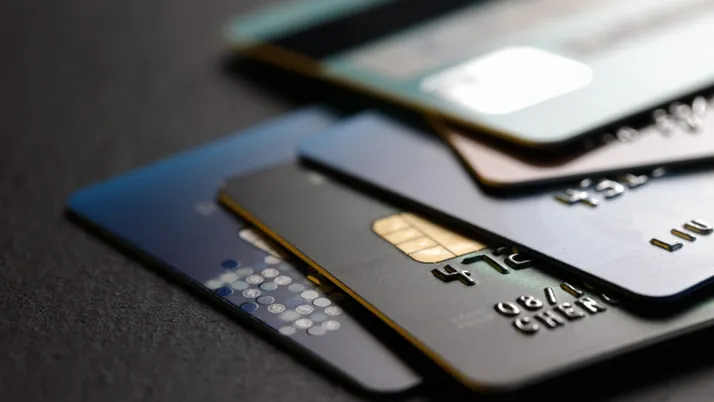

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
cc_app = pd.read_csv("credit_card_application_record.csv")
cc_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
cc_app.shape

(438557, 18)

In [4]:
cc_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
cc_record = pd.read_csv("credit_record.csv") 
cc_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
cc_record.shape

(1048575, 3)

In [7]:
cc_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Exploratory Data Analysis

In [8]:
cc_app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [9]:
cc_app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [10]:
# dropping occupation type which has many null values
cc_app.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [11]:
# Checking duplicates in 'ID' column
len(cc_app['ID']) - len(cc_app['ID'].unique())

47

In [12]:
# Dropping duplicate entries from ID column
cc_app = cc_app.drop_duplicates('ID', keep='last')

In [13]:
# Checking Non-Numerical Columns
category_col = cc_app.columns[(cc_app.dtypes =='object').values].tolist()
category_col

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [14]:
# Checking Numerical Columns
cc_app.columns[(cc_app.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [15]:
# Checking unique values from Categorical Columns

for i in cc_app.columns[(cc_app.dtypes =='object').values].tolist():
    print(i,'\n')
    print(cc_app[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299798
Single / not ma

In [16]:
# Checking unique values from Numerical Columns
cc_app['CNT_CHILDREN'].value_counts()

0     304038
1      88518
2      39879
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [17]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', cc_app['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', cc_app['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


column[DAYS_BIRTH] ---> Count backwards from current day (0), -1 means yesterday

column[DAYS_EMPLOYED] ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

In [18]:
# Converting 'DAYS_BIRTH' values from Day to Years
cc_app['DAYS_BIRTH'] = round(cc_app['DAYS_BIRTH']/-365,0)
cc_app.rename(columns={'DAYS_BIRTH':'AGE'}, inplace=True)

In [19]:
# Checking unique values greater than 0
cc_app[cc_app['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [20]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
cc_app['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [21]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
cc_app['DAYS_EMPLOYED'] = abs(round(cc_app['DAYS_EMPLOYED']/-365,0))
cc_app.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

In [22]:
cc_app['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [23]:
# As all the values in column are 1, hence dropping column
cc_app.drop('FLAG_MOBIL', axis=1, inplace=True)

In [24]:
cc_app['FLAG_WORK_PHONE'].value_counts()

0    348118
1     90392
Name: FLAG_WORK_PHONE, dtype: int64

In [25]:
# This column only contains 0 & 1 values for Mobile, so dropping column
cc_app.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [26]:
cc_app['FLAG_PHONE'].value_counts()

0    312323
1    126187
Name: FLAG_PHONE, dtype: int64

In [27]:
# This column only contains 0 & 1 values  and is not an important feature, so dropping column
cc_app.drop('FLAG_PHONE', axis=1, inplace=True)

In [28]:
cc_app['FLAG_EMAIL'].value_counts()

0    391062
1     47448
Name: FLAG_EMAIL, dtype: int64

In [29]:
# This column only contains 0 & 1 values  and is not an important feature, so dropping column
cc_app.drop('FLAG_EMAIL', axis=1, inplace=True)

In [30]:
cc_app['CNT_FAM_MEMBERS'].value_counts()

2.0     233867
1.0      84483
3.0      77119
4.0      37351
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [31]:
cc_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


Boxplot visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x20698f385e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20698f38c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20698f38220>],
 'medians': [<matplotlib.lines.Line2D at 0x20698f483a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20698f48ac0>],
 'means': [<matplotlib.lines.Line2D at 0x20698f48730>]}

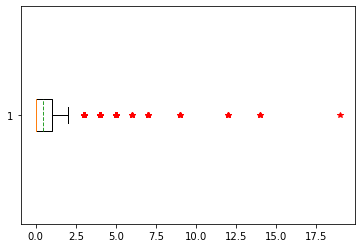

In [32]:
#create plot to detect outliers
plt.boxplot(cc_app['CNT_CHILDREN'],sym="r*",vert=False,showmeans=True,meanline=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2069903c760>,
 'caps': [<matplotlib.lines.Line2D at 0x2069903ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069903c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x206990485e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20699048d00>],
 'means': [<matplotlib.lines.Line2D at 0x20699048970>]}

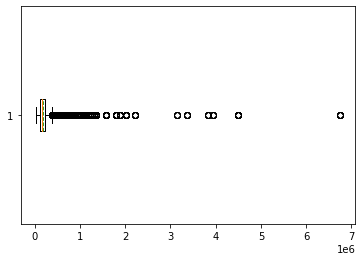

In [33]:
plt.boxplot(cc_app['AMT_INCOME_TOTAL'],sym="o",vert=False,showmeans=True,meanline=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x206990b5790>,
 'caps': [<matplotlib.lines.Line2D at 0x206990b5eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x206990b5400>],
 'medians': [<matplotlib.lines.Line2D at 0x206990c0610>],
 'fliers': [<matplotlib.lines.Line2D at 0x206990c0d30>],
 'means': [<matplotlib.lines.Line2D at 0x206990c09a0>]}

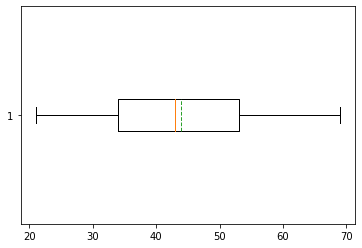

In [34]:
plt.boxplot(cc_app['AGE'],sym="o",vert=False,showmeans=True,meanline=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x20699121850>,
 'caps': [<matplotlib.lines.Line2D at 0x20699121f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x206991214c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069912f6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069912fdf0>],
 'means': [<matplotlib.lines.Line2D at 0x2069912fa60>]}

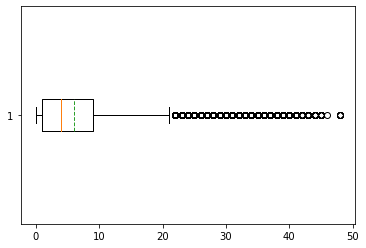

In [35]:
plt.boxplot(cc_app['YEARS_EMPLOYED'],sym="o",vert=False,showmeans=True,meanline=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2069918f520>,
 'caps': [<matplotlib.lines.Line2D at 0x2069918fc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069918f190>],
 'medians': [<matplotlib.lines.Line2D at 0x2069919b3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069919bac0>],
 'means': [<matplotlib.lines.Line2D at 0x2069919b730>]}

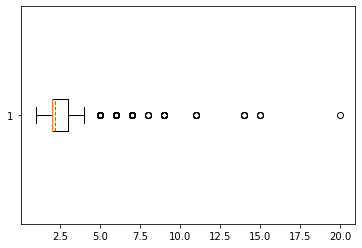

In [36]:
plt.boxplot(cc_app['CNT_FAM_MEMBERS'],sym="o",vert=False,showmeans=True,meanline=True)

Based on the scatter plot,It's important to remove outliers to build model

In [37]:
high_bound = cc_app['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_app['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [38]:
cc_app = cc_app[(cc_app['CNT_CHILDREN']>=low_bound) & (cc_app['CNT_CHILDREN']<=high_bound)]

In [39]:
high_bound2 = cc_app['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound2 :', high_bound2)
low_bound2 = cc_app['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound2 :', low_bound2)

high_bound2 : 990000.0
low_bound2 : 36000.0


In [40]:
cc_app = cc_app[(cc_app['AMT_INCOME_TOTAL']>=low_bound2) & (cc_app['AMT_INCOME_TOTAL']<=high_bound2)]

In [41]:
high_bound3 = cc_app['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound3 :', high_bound3)
low_bound3 = cc_app['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound3 :', low_bound3)

high_bound3 : 40.0
low_bound3 : 0.0


In [42]:
cc_app = cc_app[(cc_app['YEARS_EMPLOYED']>=low_bound3) & (cc_app['YEARS_EMPLOYED']<=high_bound3)]

In [43]:
high_bound4 = cc_app['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound4 :', high_bound4)
low_bound4 = cc_app['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound4 :', low_bound4)

high_bound4 : 6.0
low_bound4 : 1.0


In [44]:
cc_app = cc_app[(cc_app['CNT_FAM_MEMBERS']>=low_bound4) & (cc_app['CNT_FAM_MEMBERS']<=high_bound4)]

In [45]:
cc_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [46]:
cc_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [47]:
cc_app.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
dtype: int64

In [48]:
cc_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [49]:
# categorizing 'STATUS' column to binary classification   0 : Good Client and 1 : bad client
cc_record['STATUS'].replace(['C', 'X'],0, inplace=True)

In [50]:
cc_record['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [51]:
#Previously the 'STATUS'column data type is object so we convert it into integer to build model
cc_record['STATUS'] = cc_record['STATUS'].astype('int')

In [52]:
cc_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 20.0 MB


In [53]:
cc_record['STATUS'].value_counts(normalize=True)

0    0.986464
1    0.013536
Name: STATUS, dtype: float64

In [54]:
credit_trans = cc_record.groupby('ID').agg(max).reset_index()

In [55]:
credit_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [56]:
credit_trans['STATUS'].value_counts(normalize=True)

0    0.883658
1    0.116342
Name: STATUS, dtype: float64

In [57]:
# merging the two datasets based on 'ID'
final_data = pd.merge(cc_app, credit_trans, on='ID', how='inner')
final_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [58]:
final_data.shape

(36326, 14)

In [59]:
# dropping 'ID' column as it is not required for ML Model
final_data.drop('ID', axis=1, inplace=True)

In [60]:
# checking if there are still duplicate rows in Final Dataframe
len(final_data) - len(final_data.drop_duplicates())

25268

In [61]:
# Dropping duplicate records
final_data = final_data.drop_duplicates()
final_data.reset_index(drop=True ,inplace=True)

In [62]:
final_data.shape

(11058, 13)

In [63]:
#Check if there are still null values
final_data.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [64]:
final_data['STATUS'].value_counts(normalize=True)

0    0.785133
1    0.214867
Name: STATUS, dtype: float64

In [65]:
final_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


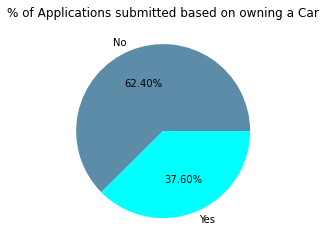

In [66]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(final_data['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'],colors=["#5d8ca8","cyan","lavender"],autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

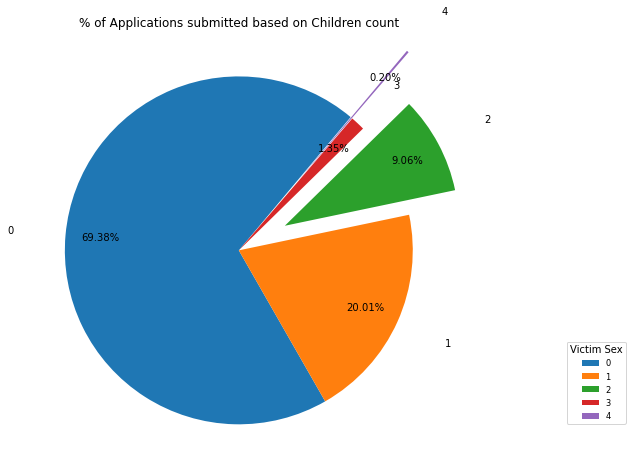

In [67]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_data['CNT_CHILDREN'].value_counts(), labels=final_data['CNT_CHILDREN'].value_counts().index,autopct='%1.2f%%'
       ,startangle=50,explode=(0,0,0.3,0,0.5),pctdistance=0.8,labeldistance=1.3)
plt.title('% of Applications submitted based on Children count')
plt.legend(loc="best",fontsize="small"
         ,title_fontsize=10,markerfirst=True, #Place the legend on the left side
           bbox_to_anchor=(0.9, 0., 0.5, 0.3),title="Victim Sex") #Position the legend
plt.show()

Feature Selection

In [68]:
final_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


In [69]:
cat_column = final_data.columns[(final_data.dtypes =='object').values].tolist()
cat_column

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [70]:
#Converting all Categorical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_column:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        final_data[col] = globals()['LE_{}'.format(col)].fit_transform(final_data[col])
final_data.head() 

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0,1
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0,0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0


In [71]:
for col in cat_column:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

CODE_GENDER   :  ['F' 'M']
FLAG_OWN_CAR   :  ['N' 'Y']
FLAG_OWN_REALTY   :  ['N' 'Y']
NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [72]:
features = final_data.drop(['STATUS'], axis=1)
label = final_data['STATUS']

In [73]:
features.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0


Machine learning predictor

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

In [75]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [76]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [79]:
# XGBoost  classification

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

[22:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy :  83.74426605504587 %

Confusion matrix :
[[1640  104]
 [ 463 1281]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1744
           1       0.92      0.73      0.82      1744

    accuracy                           0.84      3488
   macro avg       0.85      0.84      0.84      3488
weighted avg       0.85      0.84      0.84      3488

